In [7]:
import os
from PIL import Image
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
import torch
import torchvision.transforms as transforms
import numpy as np

path = "/Users/liushiwen/Desktop/大四下/hw2/test_data"
dir_list = os.listdir(path)

print(f"Files and directories in '{path}':")
for item in dir_list:
    print(item)


Files and directories in '/Users/liushiwen/Desktop/大四下/hw2/test_data':
0000001.png
0000000.png
0000002.png
0018388.txt
0018389.txt
0000003.png
0000007.png
0000006.png
0000005.png
0000000.txt
0000001.txt
0018389.png
0000003.txt
0000002.txt
0018388.png
0000006.txt
0000007.txt
0000005.txt
0018383.png
0000009.txt
0000008.txt
0018382.png
0018381.png
0018385.png
0018386.png
0018387.png
0000008.png
0018382.txt
0018383.txt
0000009.png
0018381.txt
0018385.txt
0018387.txt
0018386.txt


0	0.7734375	0.4296875	0.21875	0.21875

(128, 128, 4)


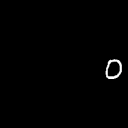

In [8]:
f = open(f"{path}/0000002.txt", "r")
print(f.read())
img = Image.open(f'{path}/0000002.png')
img = np.array(img)
print(img.shape)
img = Image.fromarray(img[:,:,2])
display(img)

In [9]:
import os
import pandas as pd
from torch.utils.data import Dataset
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, data_folder, transform=None):
        self.data_folder = data_folder
        self.image_files = [f for f in os.listdir(data_folder) if f.endswith(".png")]
        self.transform = transform

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        image_path = os.path.join(self.data_folder, self.image_files[idx])
        image = read_image(image_path)
        image = image[0].float()
        image = image.reshape(1, 128, 128)
        
        txt_file = os.path.splitext(self.image_files[idx])[0] + ".txt"
        txt_path = os.path.join(self.data_folder, txt_file)
        with open(txt_path, "r") as f:
            first_line = f.readline().strip()
            class_label = int(first_line.split()[0])

        if self.transform:
            image = self.transform(image)

        return image, class_label

transform = transforms.Compose([transforms.Resize((128, 128)),
                                ])
data_folder = path
custom_dataset = CustomImageDataset(data_folder, transform)


In [10]:
print(custom_dataset[0][0])

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])


In [11]:
train_loader = DataLoader(custom_dataset, batch_size=4, shuffle=True)
# test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)
print(len(train_loader))

5


In [14]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(16 * 64 * 64, 128)
        self.fc2 = nn.Linear(128, 2)  # 10 output classes

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = x.view(-1, 16 * 64 * 64)  # Flatten the feature maps
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    
model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

epochs = 1000
for epoch in range(epochs):
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        # print(labels, outputs)
        loss = criterion(outputs, labels.long())
        loss.backward()
        optimizer.step()

    if epoch % 10 == 9 or epoch < 10:
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')

Epoch 1/1000, Loss: 1.1324817933200393e-05
Epoch 2/1000, Loss: 0.0
Epoch 3/1000, Loss: 0.0
Epoch 4/1000, Loss: 0.0
Epoch 5/1000, Loss: 0.0
Epoch 6/1000, Loss: 0.0
Epoch 7/1000, Loss: 0.0
Epoch 8/1000, Loss: 3.576278118089249e-07
Epoch 9/1000, Loss: 0.0
Epoch 10/1000, Loss: 0.0
Epoch 20/1000, Loss: 0.0
Epoch 30/1000, Loss: 0.0
Epoch 40/1000, Loss: 0.0
Epoch 50/1000, Loss: 0.0
Epoch 60/1000, Loss: 0.0
Epoch 70/1000, Loss: 0.0
Epoch 80/1000, Loss: 0.0
Epoch 90/1000, Loss: 0.0


KeyboardInterrupt: 

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader

# Define the CNN architecture
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(16 * 64 * 64, 128)
        self.fc2 = nn.Linear(128, 10)  # 10 output classes

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = x.view(-1, 16 * 64 * 64)  # Flatten the feature maps
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Load CIFAR-10 dataset (you can replace this with your own dataset)
transform = transforms.Compose([transforms.Resize((128, 128)),
                                transforms.ToTensor()])
train_dataset = CIFAR10(root="./data", train=True, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)

# Initialize the model
model = SimpleCNN()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop (you can adjust the number of epochs)
for epoch in range(10):
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        print(outputs)
        print(labels)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        break
    print(f"Epoch [{epoch+1}/10], Loss: {loss.item()}")

# Evaluate the model on a validation/test dataset
# (similar to the training loop but using validation/test data)
# ...

# Save the trained model
# torch.save(model.state_dict(), "simple_cnn_model.pth")


Files already downloaded and verified
tensor([[-0.0370, -0.0774, -0.1944, -0.1077, -0.0653,  0.0758, -0.0353,  0.0713,
          0.0339, -0.0830],
        [-0.0468, -0.0486, -0.1199, -0.0517, -0.0887,  0.0585, -0.0269,  0.0273,
          0.0667, -0.1007],
        [-0.0311, -0.0728, -0.1561, -0.0592, -0.0468,  0.0428, -0.0086,  0.0467,
          0.0123, -0.0589],
        [-0.0295, -0.0325, -0.1210, -0.0421, -0.0297,  0.0357, -0.0792, -0.0095,
         -0.0038, -0.0641]], grad_fn=<AddmmBackward0>)
tensor([8, 7, 9, 8])
Epoch [1/10], Loss: 2.268433094024658
tensor([[-2.3636,  0.2015, -0.5841, -1.2966, -2.4347,  0.1105, -1.8953,  2.1597,
          4.9252,  0.2118],
        [-2.6802,  0.2150, -0.5860, -1.3900, -2.7268,  0.1192, -2.0908,  2.2224,
          6.0034,  0.5378],
        [-2.7443,  0.1947, -0.6499, -1.3994, -2.5631,  0.2552, -2.1583,  2.3136,
          5.5021, -0.0383],
        [-3.8124,  0.3114, -0.8124, -1.8925, -3.5374,  0.3578, -2.9969,  3.0534,
          8.2173,  0.2968]], gra

In [ ]:

# Save the trained model
torch.save(model.state_dict(), "simple_cnn_model.pth")
